# MNIST with Noise

In [30]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), _ = keras.datasets.mnist.load_data()

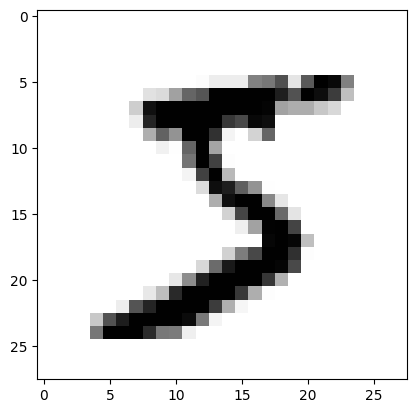

In [3]:
plt.imshow(X_train[0], cmap = "binary")

In [4]:
X_train_flattened = X_train.reshape((60000, 28 * 28))
X_train_flattened = X_train_flattened.astype("float32") / 255

In [5]:
X_train_flattened[0].shape

(784,)

In [20]:
# This line effectively doubles the size of the image with noise
X_train_flattened_with_noise = np.concatenate(
    [X_train_flattened, np.random.random((len(X_train_flattened), 784))], axis = 1
)

X_train_flattened_with_zeros = np.concatenate(
    [X_train_flattened, np.zeros((len(X_train_flattened), 784))], axis = 1
)


In [21]:
# Show an image with the noise
example_with_noise = X_train_flattened_with_noise[0].reshape(28 * 2, 28)
example_with_zeros = X_train_flattened_with_zeros[0].reshape(28 * 2, 28)

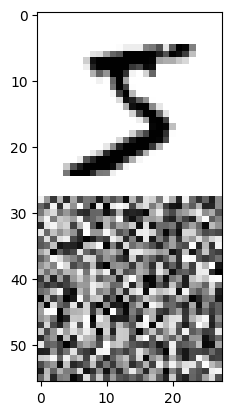

In [15]:
plt.imshow(example_with_noise, cmap = "binary")

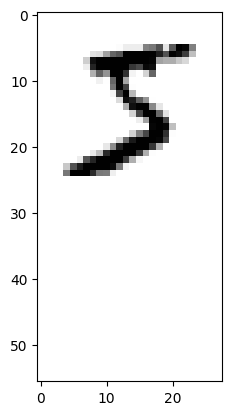

In [22]:
plt.imshow(example_with_zeros, cmap = "binary")

In [24]:
def get_model():
    model = keras.Sequential(
        [
            keras.layers.Dense(512, activation = "relu"),
            keras.layers.Dense(10, activation = "softmax")
        ]
    )

    model.compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )

    return model

In [28]:
model = get_model()
history_noise = model.fit(
    X_train_flattened_with_noise,
    y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7799 - loss: 0.7058 - val_accuracy: 0.9265 - val_loss: 0.2586
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9311 - loss: 0.2404 - val_accuracy: 0.9301 - val_loss: 0.2306
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9532 - loss: 0.1573 - val_accuracy: 0.9528 - val_loss: 0.1636
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9684 - loss: 0.1089 - val_accuracy: 0.9558 - val_loss: 0.1516
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9801 - loss: 0.0757 - val_accuracy: 0.9607 - val_loss: 0.1346
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0542 - val_accuracy: 0.9622 - val_loss: 0.1231
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0410 - val_accuracy: 0.9609 - val_loss: 0.1344
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9932 - loss: 0.0276 - val_accuracy: 0.

In [29]:
model = get_model()
history_zeros = model.fit(
    X_train_flattened_with_noise,
    y_train,
    epochs = 10,
    batch_size = 128,
    validation_split = 0.2
)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7847 - loss: 0.6841 - val_accuracy: 0.9169 - val_loss: 0.2799
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9283 - loss: 0.2477 - val_accuracy: 0.9388 - val_loss: 0.2078
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9529 - loss: 0.1605 - val_accuracy: 0.9494 - val_loss: 0.1755
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9683 - loss: 0.1107 - val_accuracy: 0.9520 - val_loss: 0.1621
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9757 - loss: 0.0832 - val_accuracy: 0.9568 - val_loss: 0.1479
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9855 - loss: 0.0573 - val_accuracy: 0.9598 - val_loss: 0.1344
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.0386 - val_accuracy: 0.9638 - val_loss: 0.1247
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9949 - loss: 0.0229 - val_accuracy: 0.

In [48]:
df = pd.DataFrame({
    "Epochs": range(1, 11),
    "Validation accuracy with noise channels": history_noise.history["val_accuracy"],
    "Validation accuracy with zeros channels": history_zeros.history["val_accuracy"],
})

<Axes: xlabel='Epochs'>

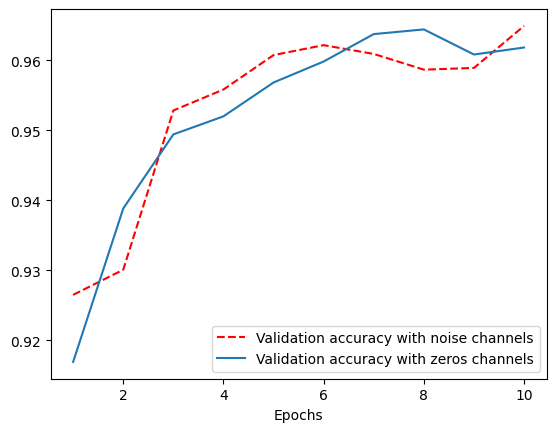

In [47]:
df.plot(
    x = "Epochs",
    style = {
        "Validation accuracy with noise channels": "b-",
        "Validation accuracy with zeros channels": "r--",
    }
)